In [264]:
import pandas as pd
import numpy as np
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from sklearn.model_selection import train_test_split

In [130]:
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (10, 6)
matplotlib.rcParams["figure.facecolor"] = "#00000000"

In [131]:
medical_df = pd.read_csv("medical.csv")

medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [132]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [133]:
medical_df.select_dtypes(include=["object"]).value_counts()

medical_df.sex.value_counts(normalize=True)

male      0.505232
female    0.494768
Name: sex, dtype: float64

In [134]:
medical_df.smoker.value_counts(normalize=True)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

In [135]:
medical_df.region.value_counts(normalize=True)

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64

In [136]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Data Visualization

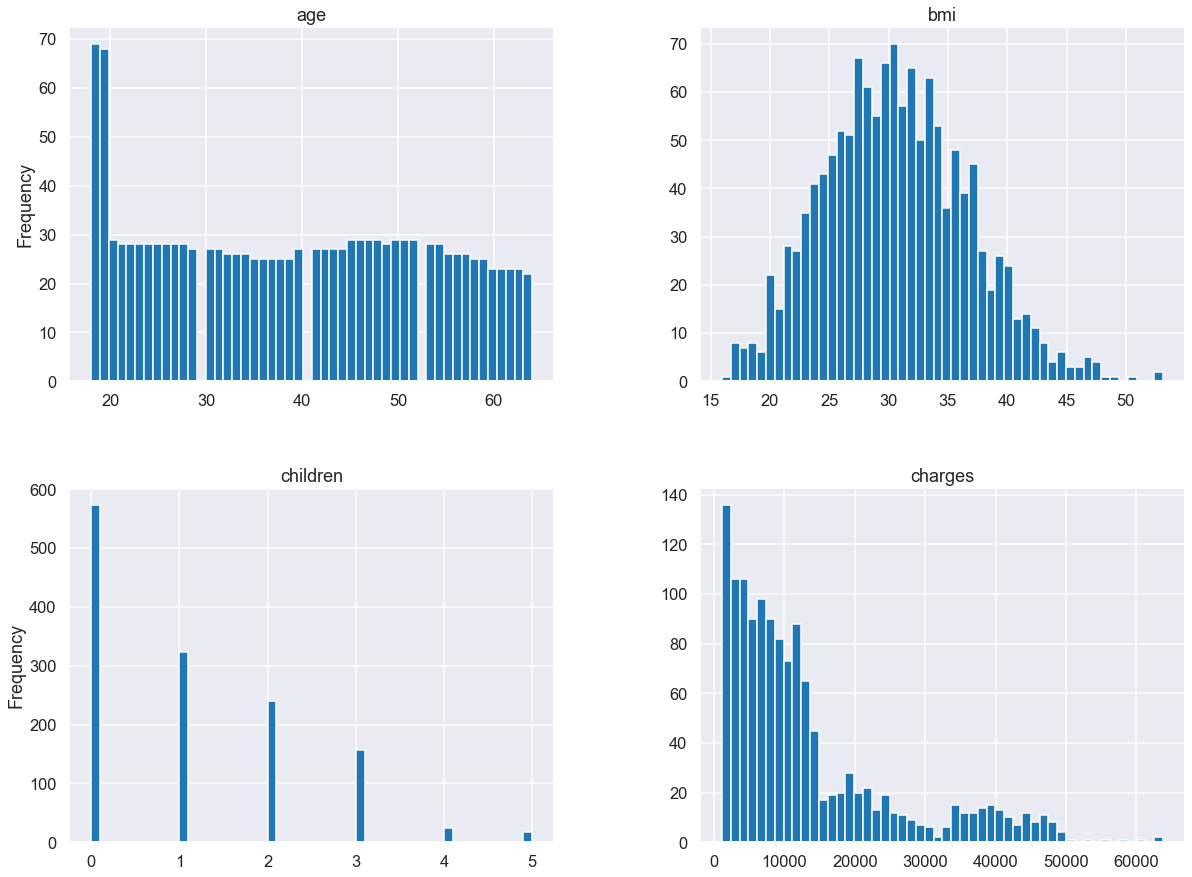

In [137]:
axList = medical_df.hist(bins=50, figsize=(20, 15))

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    # if ax.is_last_row():
    #     ax.set_xlabel('Size (cm)')

    if ax.is_first_col():
        ax.set_ylabel("Frequency")

In [138]:
fig = px.histogram(
    medical_df, x="age", marginal="box", nbins=47, title="Distribution of Age"
)
fig.update_layout(bargap=0.1)
fig.show()

In [139]:
fig = px.histogram(
    medical_df,
    x="bmi",
    marginal="box",
    nbins=47,
    color_discrete_sequence=["red"],
    title="Distribution of BMI (Body Mass Index)",
)
fig.update_layout(bargap=0.1)
fig.show()

In [140]:
fig = px.histogram(
    medical_df,
    x="charges",
    marginal="box",
    color="smoker",
    color_discrete_sequence=["green", "grey"],
    title="Annual Medical Charges",
)
fig.update_layout(bargap=0.1)
fig.show()

In [141]:
fig = px.histogram(
    medical_df,
    x="charges",
    marginal="box",
    color="sex",
    color_discrete_sequence=["green", "grey"],
    title="Annual Medical Charges",
)
fig.update_layout(bargap=0.1)
fig.show()

In [142]:
fig = px.histogram(
    medical_df,
    x="charges",
    marginal="box",
    color="region",
    color_discrete_sequence=["green", "grey", "red", "blue"],
    title="Annual Medical Charges",
)
fig.update_layout(bargap=0.1)
fig.show()

In [143]:
px.histogram(medical_df, x="smoker", color="sex", title="Smoker", histnorm="density")

## Age and Charges
Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [144]:
fig = px.scatter(
    medical_df,
    x="age",
    y="charges",
    color="smoker",
    opacity=0.8,
    hover_data=["sex"],
    title="Age vs. Charges",
)
fig.update_traces(marker_size=5)
fig.show()

## BMI and Charges
Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [145]:
fig = px.scatter(
    medical_df,
    x="bmi",
    y="charges",
    color="smoker",
    opacity=0.8,
    hover_data=["sex"],
    title="BMI vs. Charges",
)
fig.update_traces(marker_size=5)
fig.show()

In [146]:
fig = px.violin(medical_df, x="children", y="charges", title="children vs. Charges")
fig.update_traces(marker_size=5)
fig.show()

# IGNORE EVERYTHING BELOW THIS POINT

### Correlation
To compute the correlation for categorical columns, they must first be converted into numeric columns.

**Correlation vs causation fallacy:** Note that a high correlation cannot be used to interpret a cause-effect relationship between features. Two features $X$ and $Y$ can be correlated if $X$ causes $Y$ or if $Y$ causes $X$, or if both are caused independently by some other factor $Z$, and the correlation will no longer hold true if one of the cause-effect relationships is broken. It's also possible that $X$ are $Y$ simply appear to be correlated because the sample is too small. 

While this may seem obvious, computers can't differentiate between correlation and causation, and decisions based on automated system can often have major consequences on society, so it's important to study why automated systems lead to a given result. Determining cause-effect relationships requires human insight.

In [147]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [148]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [149]:
smoker_values = {"no": 0, "yes": 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [150]:
medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

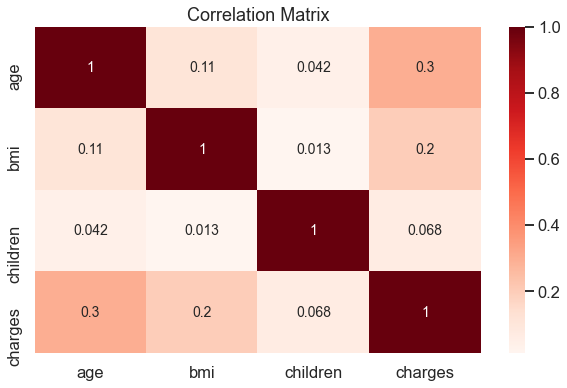

In [151]:
sns.heatmap(medical_df.corr(), cmap="Reds", annot=True)
plt.title("Correlation Matrix")

## Linear Regression using a Single Feature

We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

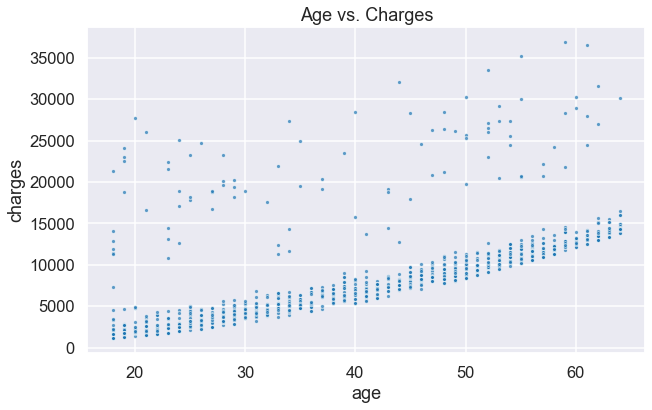

In [152]:
non_smoker_df = medical_df[medical_df.smoker == "no"]
plt.title("Age vs. Charges")
sns.scatterplot(data=non_smoker_df, x="age", y="charges", alpha=0.7, s=15)

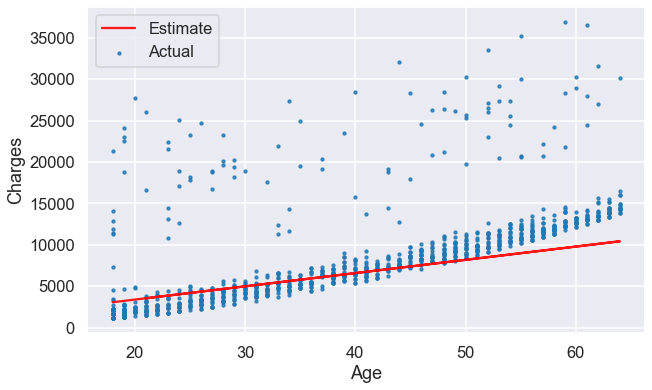

In [153]:
def estimate_charges(age, w, b):
    return w * age + b


w = 50
b = 100


def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, "r", alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel("Age")
    plt.ylabel("Charges")
    plt.legend(["Estimate", "Actual"])


try_parameters(160, 200)

In [154]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))


targets = non_smoker_df["charges"]
predicted = estimate_charges(non_smoker_df.age, w, b)

rmse(targets, predicted)

8461.949562575488

In [155]:
model = LinearRegression()
inputs = non_smoker_df[["age"]]
targets = non_smoker_df.charges
print("inputs.shape :", inputs.shape)
print("targes.shape :", targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [156]:
model.fit(inputs, targets)

LinearRegression()

In [157]:
model.predict(np.array([[23], [37], [61]]))

array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [158]:
predictions = model.predict(inputs)

In [159]:
rmse(targets, predictions)

4662.505766636392

In [160]:
model.coef_

array([267.24891283])

In [161]:
model.intercept_

-2091.420556565079

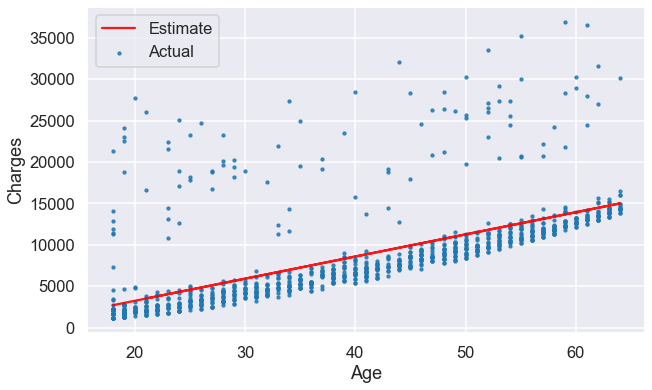

In [162]:
try_parameters(model.coef_, model.intercept_)

## Linear Regression using Multiple Features

So far, we've used on the "age" feature to estimate "charges". Adding another feature like "bmi" is fairly straightforward. We simply assume the following relationship:

$charges = w_1 \times age + w_2 \times bmi + b$

We need to change just one line of code to include the BMI.

In [163]:
# Create inputs and targets
inputs, targets = non_smoker_df[["age", "bmi"]], non_smoker_df["charges"]

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print("Loss:", loss)

Loss: 4662.312835461298


As you can see, adding the BMI doesn't seem to reduce the loss by much, as the BMI has a very weak correlation with charges, especially for non smokers.

In [164]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.08403654312833268

In [165]:
# Create inputs and targets
inputs, targets = non_smoker_df[["age", "bmi", "children"]], non_smoker_df["charges"]

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print("Loss:", loss)

Loss: 4608.470405038245


## Using Categorical Features for Machine Learning

So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals

## Binary Categories

The "smoker" category has just two values "yes" and "no". Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes".

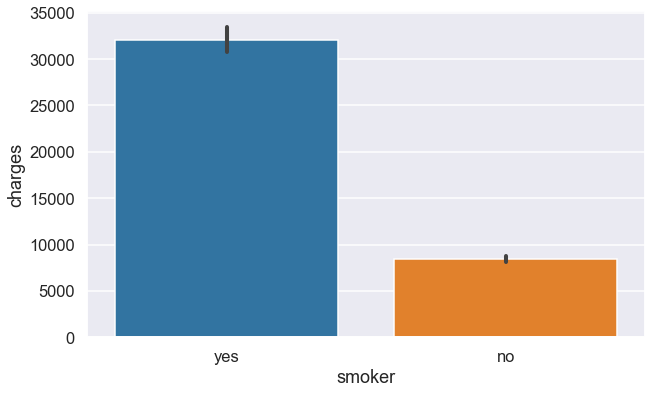

In [166]:
sns.barplot(data=medical_df, x="smoker", y="charges")

In [167]:
smoker_codes = {"no": 0, "yes": 1}
medical_df["smoker_code"] = medical_df.smoker.map(smoker_codes)

In [168]:
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

In [169]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [170]:
# Create inputs and targets
inputs, targets = (
    medical_df[["age", "bmi", "children", "smoker_code"]],
    medical_df["charges"],
)

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print("Loss:", loss)

Loss: 6056.439217188078


In [171]:
sex_codes = {"female": 0, "male": 1}
medical_df["sex_code"] = medical_df.sex.map(sex_codes)

In [172]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025484

In [173]:
# Create inputs and targets
inputs, targets = (
    medical_df[["age", "bmi", "children", "smoker_code", "sex_code"]],
    medical_df["charges"],
)

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print("Loss:", loss)

Loss: 6056.1007087545395


In [174]:
enc = OneHotEncoder()
enc.fit(medical_df[["region"]])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

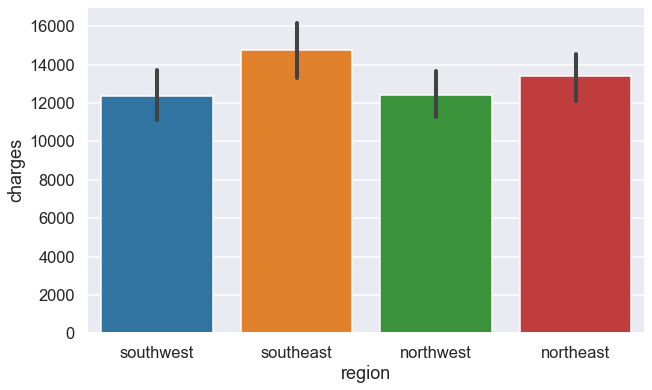

In [175]:
sns.barplot(data=medical_df, x="region", y="charges")

In [176]:
one_hot = enc.transform(medical_df[["region"]]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [177]:
medical_df[["northeast", "northwest", "southeast", "southwest"]] = one_hot
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


In [178]:
# Create inputs and targets
input_cols = [
    "age",
    "bmi",
    "children",
    "smoker_code",
    "sex_code",
    "northeast",
    "northwest",
    "southeast",
    "southwest",
]
inputs, targets = medical_df[input_cols], medical_df["charges"]

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print("Loss:", loss)

Loss: 6041.679651174455


In [179]:
weights_df = pd.DataFrame(
    {
        "feature": np.append(inputs.columns, "bias"),
        "weight": np.append(model.coef_, model.intercept_),
    }
)
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,bias,-12525.547811


## Improving performance

In [248]:
medical_df = pd.read_csv("medical.csv")

cat_col = medical_df.select_dtypes(include=["object"]).columns

num_col = medical_df.select_dtypes(include=["int64", "float64"]).columns.to_list()

num_col.remove("charges")

print(num_col, cat_col)

['age', 'bmi', 'children'] Index(['sex', 'smoker', 'region'], dtype='object')


In [249]:
print(medical_df.isnull().sum())
print(medical_df.duplicated().sum())
print(medical_df.head())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
1
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [250]:
sc = StandardScaler()
sc.fit(medical_df[num_col])

medical_df[num_col] = sc.transform(medical_df[num_col])

medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,female,-0.453320,-0.908614,yes,southwest,16884.92400
1,-1.509965,male,0.509621,-0.078767,no,southeast,1725.55230
2,-0.797954,male,0.383307,1.580926,no,southeast,4449.46200
3,-0.441948,male,-1.305531,-0.908614,no,northwest,21984.47061
4,-0.513149,male,-0.292556,-0.908614,no,northwest,3866.85520


In [251]:
sc.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [252]:
medical_df = pd.get_dummies(medical_df, columns=cat_col, drop_first=True)

In [253]:
# Create inputs and targets
inputs, targets = medical_df.drop("charges", axis=1), medical_df["charges"]
inputs.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0,1,0,0,1
1,-1.509965,0.509621,-0.078767,1,0,0,1,0
2,-0.797954,0.383307,1.580926,1,0,0,1,0
3,-0.441948,-1.305531,-0.908614,1,0,1,0,0
4,-0.513149,-0.292556,-0.908614,1,0,1,0,0


In [254]:
# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print("Loss:", loss)

Loss: 6041.679651174455


In [255]:
weights_df = pd.DataFrame(
    {
        "feature": np.append(inputs.columns, "bias"),
        "weight": np.append(model.coef_, model.intercept_),
    }
)
weights_df

,feature,weight
0,age,3607.472736
1,bmi,2067.691966
2,children,572.998210
3,sex_male,-131.314359
4,smoker_yes,23848.534542
5,region_northwest,-352.963899
6,region_southeast,-1035.022049
7,region_southwest,-960.050991
8,bias,9053.492450


## Check for skewness/Normality

In [256]:
num_col = medical_df.select_dtypes(
    include=["int64", "float64"]).columns.to_list()

skew_limit = 0.75  # define a limit above which we will log transform
skew_vals = medical_df[num_col].skew()
print(skew_vals)

# Showing the skewed columns
skew_cols = (
    skew_vals.sort_values(ascending=False)
    .to_frame()
    .rename(columns={0: "Skew"})
    .query("abs(Skew) > {}".format(skew_limit))
)

skew_cols

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64


,Skew
charges,1.51588
children,0.93838


In [257]:
fig = px.histogram(
    medical_df,
    x="charges",
    marginal="box",
    color="sex_male",
    color_discrete_sequence=["green", "grey"],
    title="Annual Medical Charges",
)
fig.update_layout(bargap=0.1)
fig.show()

In [258]:

medical_df["charges"], lam = boxcox(medical_df["charges"])
# medical_df["charges"] = medical_df["charges"].apply(np.log1p)
medical_df["charges"].skew()

-0.008734097133920404

In [259]:
fig = px.histogram(
    medical_df,
    x="charges",
    marginal="box",
    color="sex_male",
    color_discrete_sequence=["green", "grey"],
    title="Annual Medical Charges",
)
fig.update_layout(bargap=0.1)
fig.show()

In [260]:
# for col in skew_cols.index.values:
#     medical_df[col] = medical_df[col].apply(np.log1p)

# Create inputs and targets
inputs, targets = medical_df.drop("charges", axis=1), medical_df["charges"]
inputs.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0,1,0,0,1
1,-1.509965,0.509621,-0.078767,1,0,0,1,0
2,-0.797954,0.383307,1.580926,1,0,0,1,0
3,-0.441948,-1.305531,-0.908614,1,0,1,0,0
4,-0.513149,-0.292556,-0.908614,1,0,1,0,0


In [263]:
# Create and train the model


model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

predictions = inv_boxcox(predictions, lam)

targets = inv_boxcox(targets, lam)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print("Loss:", loss)

Loss: 7841.319858819971


In [247]:
weights_df = pd.DataFrame(
    {
        "feature": np.append(inputs.columns, "bias"),
        "weight": np.append(model.coef_, model.intercept_),
    }
)
weights_df

,feature,weight
0,age,0.709436
1,bmi,0.126123
2,children,0.175876
3,sex_male,-0.106553
4,smoker_yes,2.343028
5,region_northwest,-0.092797
6,region_southeast,-0.227747
7,region_southwest,-0.188060
8,bias,10.901969


In [390]:
medical_df = pd.read_csv("medical.csv")

# Create inputs and targets
inputs, targets = medical_df.drop("charges", axis=1), medical_df["charges"]

inputs_train, inputs_test, targets_train, targets_test = train_test_split(
    inputs, targets, test_size=0.2, random_state=42
)
medical_df.head(), medical_df.shape

(   age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520,
 (1338, 7))

In [387]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import (
    LinearRegression,
    LassoCV,
    RidgeCV,
    Lasso,
    Ridge,
    ElasticNet,
)
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import PCA


numerical_transformer = Pipeline(
    [
        ("polynomial_features", PolynomialFeatures()),
        ("scaler", StandardScaler()),
    ]
)

# Preprocessing for categorical data
categorical_transformer = Pipeline(
    steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))]
)


# Ensure that num_col and cat_col are defined correctly
num_col = ["age", "bmi", "children"]
cat_col = ["region", "sex", "smoker"]

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, num_col),
        ("cat", categorical_transformer, cat_col),
    ]
)

my_pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ("lr", LinearRegression())]
)

my_pipeline.fit(inputs_train, targets_train)

# r2 score error
my_pipeline.score(inputs_test, targets_test)

0.7802200772760515

In [375]:
predictions_test = my_pipeline.predict(inputs_test)

predictions_train = my_pipeline.predict(inputs_train)

# Compute loss to evalute the model

loss = np.sqrt(mean_squared_error(targets_test, predictions_test))
loss2 = np.sqrt(mean_squared_error(targets_train, predictions_train))

print("Test Loss:", loss, loss2, r2_score(targets_test, predictions_test))

Test Loss: 5841.280185905571 6030.766544999231 0.7802200772760515


In [376]:

my_pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ("lr", LinearRegression())]
)

params = {"preprocessor__num__polynomial_features__degree": [1, 2, 3, 4]}


kf = KFold(shuffle=True, random_state=72018, n_splits=5)

grid_search = GridSearchCV(
    my_pipeline, params, cv=10, scoring="neg_root_mean_squared_error"
)

grid_search.fit(inputs_train, targets_train)

best_params = grid_search.best_params_

best_params, np.abs(grid_search.best_score_)

({'preprocessor__num__polynomial_features__degree': 2}, 6104.778093881547)

In [377]:
rmse = np.abs(grid_search.score(inputs_test, targets_test))
rmse

5841.280185905571

## Ridge Regression

In [378]:
numerical_transformer = Pipeline(
    [
        ("polynomial_features", PolynomialFeatures()),
        ("scaler", StandardScaler()),
    ]
)

# Preprocessing for categorical data
categorical_transformer = Pipeline(
    steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))]
)

params = {
    "numerical_transformer_polynomial_features__degree": [1, 2, 3],
}

# Ensure that num_col and cat_col are defined correctly
num_col = ["age", "bmi", "children"]
cat_col = ["region", "sex", "smoker"]

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, num_col),
        ("cat", categorical_transformer, cat_col),
    ]
)

my_pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ("ridge_regression", Ridge())]
)

params = {
    "preprocessor__num__polynomial_features__degree": [1, 2, 3, 4],
    "ridge_regression__alpha": np.geomspace(4, 20, 30),
}

# kf = KFold(shuffle=True, random_state=72018, n_splits=5)

grid_searchR = GridSearchCV(
    my_pipeline, params, cv=10, scoring="neg_root_mean_squared_error"
)
grid_searchR.fit(inputs_train, targets_train)

rmse_r = np.abs(grid_searchR.score(inputs_test, targets_test))
rmse_r

5866.845580422482

In [379]:
best_params = grid_searchR.best_params_
best_params, np.abs(grid_searchR.best_score_)

({'preprocessor__num__polynomial_features__degree': 4,
  'ridge_regression__alpha': 4.0},
 6093.668302371583)

## Lasso Regression

In [380]:
numerical_transformer = Pipeline(
    [
        ("polynomial_features", PolynomialFeatures()),
        ("scaler", StandardScaler()),
    ]
)

# Preprocessing for categorical data
categorical_transformer = Pipeline(
    steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))]
)

params = {
    "numerical_transformer_polynomial_features__degree": [1, 2, 3],
}

# Ensure that num_col and cat_col are defined correctly
num_col = ["age", "bmi", "children"]
cat_col = ["region", "sex", "smoker"]

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, num_col),
        ("cat", categorical_transformer, cat_col),
    ]
)

my_pipeline = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("lasso_regression", Lasso(max_iter=100000))]
)

params = {
    "preprocessor__num__polynomial_features__degree": [1, 2, 3, 4],
    "lasso_regression__alpha": np.geomspace(4, 20, 30),
}

kf = KFold(shuffle=True, random_state=72018, n_splits=5)

grid_searchLs = GridSearchCV(
    my_pipeline,
    params,
    cv=10,
    scoring="neg_root_mean_squared_error",
)
grid_searchLs.fit(inputs_train, targets_train)

rmse_l = np.abs(grid_searchLs.score(inputs_test, targets_test))
rmse_l

5794.7373859782065

In [382]:
best_paramsL = grid_searchLs.best_params_
best_paramsL, np.abs(grid_searchLs.best_score_)

({'lasso_regression__alpha': 20.000000000000004,
  'preprocessor__num__polynomial_features__degree': 2},
 6084.592920428906)

## Elastic Net

In [383]:
numerical_transformer = Pipeline(
    [
        ("polynomial_features", PolynomialFeatures()),
        ("scaler", StandardScaler()),
    ]
)

# Preprocessing for categorical data
categorical_transformer = Pipeline(
    steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))]
)

params = {
    "numerical_transformer_polynomial_features__degree": [1, 2, 3],
}

# Ensure that num_col and cat_col are defined correctly
num_col = ["age", "bmi", "children"]
cat_col = ["region", "sex", "smoker"]

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, num_col),
        ("cat", categorical_transformer, cat_col),
    ]
)

my_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("elastic_regression", ElasticNet(max_iter=100000)),
    ]
)

params = {
    "preprocessor__num__polynomial_features__degree": [1, 2, 3, 4],
    "elastic_regression__alpha": np.geomspace(4, 20, 30),
    "elastic_regression__l1_ratio": np.linspace(0.1, 0.9, 9),
}

kf = KFold(shuffle=True, random_state=72018, n_splits=5)

grid_searchE = GridSearchCV(
    my_pipeline,
    params,
    cv=10,
    scoring="neg_root_mean_squared_error",
)
grid_searchE.fit(inputs_train, targets_train)

rmse_e = np.abs(grid_searchE.score(inputs_test, targets_test))
rmse_e

8094.022705414019

In [384]:
best_params = grid_searchE.best_params_
best_params, np.abs(grid_searchE.best_score_)

({'elastic_regression__alpha': 4.0,
  'elastic_regression__l1_ratio': 0.9,
  'preprocessor__num__polynomial_features__degree': 3},
 8093.45491691159)

In [385]:
rmse_vals = [rmse, rmse_r, rmse_l, rmse_e]

labels = ["Linear", "Ridge", "Lasso", "ElasticNet"]

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: "RMSE"}, inplace=1)
rmse_df

,RMSE
Linear,5841.280186
Ridge,5866.845580
Lasso,5794.737386
ElasticNet,8094.022705


In [389]:
numerical_transformer = Pipeline(
    [
        ("polynomial_features", PolynomialFeatures()),
        ("scaler", StandardScaler()),
    ]
)

# Preprocessing for categorical data
categorical_transformer = Pipeline(
    steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))]
)

params = {
    "numerical_transformer_polynomial_features__degree": [1, 2, 3],
}

# Ensure that num_col and cat_col are defined correctly
num_col = ["age", "bmi", "children"]
cat_col = ["region", "sex", "smoker"]

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, num_col),
        ("cat", categorical_transformer, cat_col),
    ]
)

my_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("pca", PCA()),
        ("lasso_regression", Lasso(max_iter=100000)),

    ]
)

params = {
    "preprocessor__num__polynomial_features__degree": [1, 2, 3, 4],
    "pca__n_components": [2, 3, 4, 5],
    "lasso_regression__alpha": np.geomspace(4, 20, 30),

}

kf = KFold(shuffle=True, random_state=72018, n_splits=5)

grid_searchLs = GridSearchCV(
    my_pipeline,
    params,
    cv=10,
    scoring="neg_root_mean_squared_error",
)
grid_searchLs.fit(inputs_train, targets_train)

rmse_l = np.abs(grid_searchLs.score(inputs_test, targets_test))
rmse_l

6223.860429915916